In [1]:
#explore starts around cell 32

In [2]:
import pandas as pd
import env

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

new_zillow_data() \
get_zillow_data() \
prep_zillow() \
wrangle_zillow()


# 1 Acquire:

bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips 

from the zillow database for all 'Single Family Residential' properties.

In [3]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'

In [4]:
def new_zillow_data():
    return pd.read_sql('''SELECT
    p.bedroomcnt,
    p.bathroomcnt,
    p.calculatedfinishedsquarefeet,
    p.taxvaluedollarcnt,
    p.yearbuilt,
    p.taxamount,
    p.fips,
    t.propertylandusedesc
FROM properties_2017 p
JOIN propertylandusetype t USING (propertylandusetypeid)
WHERE t.propertylandusedesc = 'Single Family Residential'
''', url)

# 1 Answer

In [5]:
def new_zillow_data():
    return pd.read_sql('''SELECT
    p.bedroomcnt,
    p.bathroomcnt,
    p.calculatedfinishedsquarefeet,
    p.taxvaluedollarcnt,
    p.yearbuilt,
    p.taxamount,
    p.fips,
    t.propertylandusedesc
FROM properties_2017 p
JOIN propertylandusetype t USING (propertylandusetypeid)
WHERE t.propertylandusedesc = 'Single Family Residential'
''', url)


import os

def get_zillow_data():
    filename = "zillow.csv"
    
    # if file is available locally, read it
    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col = 0)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        # read the SQL query into a dataframe
        df_zillow = new_zillow_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df_zillow.to_csv(filename)

        # Return the dataframe to the calling code
        return df_zillow

In [6]:
df = get_zillow_data()

# 2 Prep

Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.


In [7]:
# df.info()

#i checked it here in my original code. 
#But to prevent it from popping up whenver I import wrangle 
#I commeted out after verifying it worked

In [8]:
df.shape

(2152863, 8)

In [9]:
df.describe().round(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2152852.00,2152852.00,2144379.00,2152370.00,2143526.00,2148421.00,2152863.00
mean,3.29,2.23,1862.86,461896.24,1960.95,5634.87,6048.38
std,0.95,1.00,1222.13,699676.05,22.16,8178.91,20.43
min,0.00,0.00,1.00,1.00,1801.00,1.85,6037.00
25%,3.00,2.00,1257.00,188170.25,1949.00,2534.98,6037.00
50%,3.00,2.00,1623.00,327671.00,1958.00,4108.95,6037.00
75%,4.00,3.00,2208.00,534527.00,1976.00,6414.32,6059.00
max,25.00,32.00,952576.00,98428909.00,2016.00,1337755.86,6111.00


In [10]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
propertylandusedesc                0
dtype: int64

In [11]:
df_drop = df

In [12]:
df_drop.shape

(2152863, 8)

In [13]:
df_drop.dropna(subset=['yearbuilt'], inplace = True)

In [14]:
df_drop.dropna(subset=['taxamount'], inplace = True)

In [15]:
df_drop.dropna(subset=['calculatedfinishedsquarefeet'], inplace = True)

In [16]:
df_drop.isnull().sum()

bedroomcnt                       0
bathroomcnt                      0
calculatedfinishedsquarefeet     0
taxvaluedollarcnt               18
yearbuilt                        0
taxamount                        0
fips                             0
propertylandusedesc              0
dtype: int64

In [17]:
df_drop.dropna(subset=['taxvaluedollarcnt'], inplace = True)

In [18]:
df.shape

(2140235, 8)

In [19]:
df_drop.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusedesc             0
dtype: int64

In [20]:
df_drop.shape

(2140235, 8)

In [21]:
# if I drop all the null values:
dropped = 9337 +2708 +565 +18


In [22]:
dropped/df.shape[0]

0.005900286650764986

In [23]:
# i lose ~0.6% of the data

#i'm okay with that

In [24]:

df.shape

(2140235, 8)

In [25]:
df.dropna(inplace = True)

In [26]:
df.shape

(2140235, 8)

# 2 Answer

In [27]:
def prep_zillow(df):
    df.dropna(inplace = True)
    return

# i lose 00.59% of the data

#i'm okay with that

In [28]:
# new_zillow_data();

In [29]:
#from class

In [30]:
# new_zillow_data();

In [31]:
df[df.isna().any(axis=1)]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusedesc


In [32]:
# What's the percentage of nulls?
df.isna().mean()

bedroomcnt                      0.0
bathroomcnt                     0.0
calculatedfinishedsquarefeet    0.0
taxvaluedollarcnt               0.0
yearbuilt                       0.0
taxamount                       0.0
fips                            0.0
propertylandusedesc             0.0
dtype: float64

# Explore to address outliesr


In [33]:
df.columns.tolist()

['bedroomcnt',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'taxvaluedollarcnt',
 'yearbuilt',
 'taxamount',
 'fips',
 'propertylandusedesc']

In [34]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")

bedroomcnt
3.0     962944
4.0     633608
2.0     334221
5.0     150671
6.0      25117
1.0      22895
7.0       4792
0.0       4397
8.0       1103
9.0        290
10.0       118
11.0        34
13.0        15
12.0        12
14.0         7
15.0         5
18.0         3
16.0         2
25.0         1
Name: bedroomcnt, dtype: int64
-----------------
bathroomcnt
2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
0.00       4274
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathroomcnt, dtype: int64
---

# Histogram All The Things!

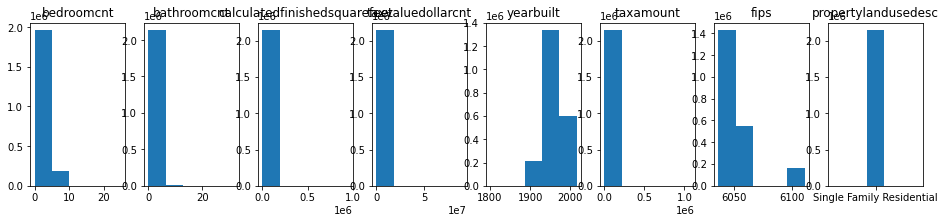

In [39]:
plt.figure(figsize=(16, 3))

# List of columns
for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,8, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)


bedroomcnt


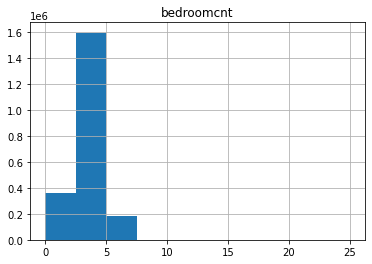

bathroomcnt


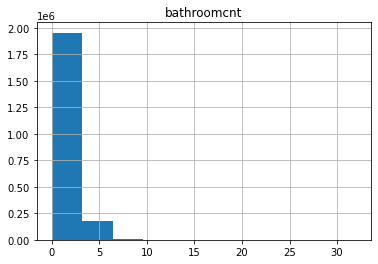

calculatedfinishedsquarefeet


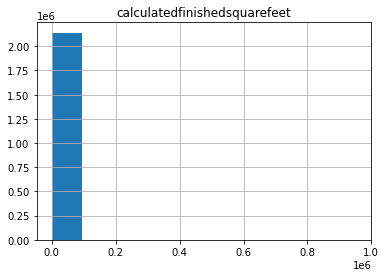

taxvaluedollarcnt


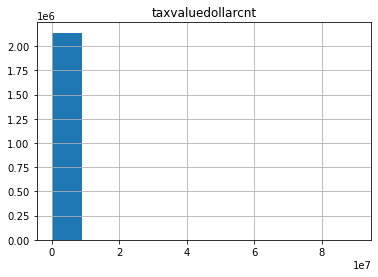

yearbuilt


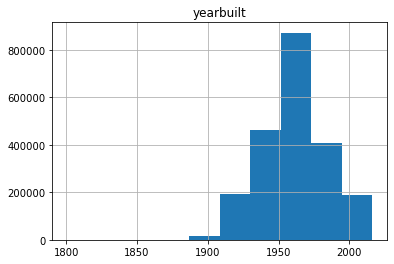

taxamount


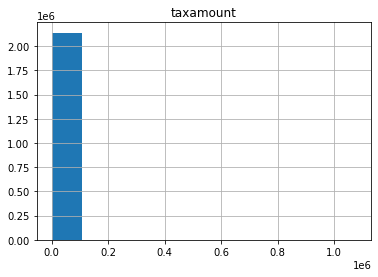

fips


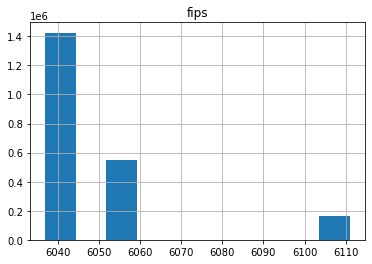

propertylandusedesc


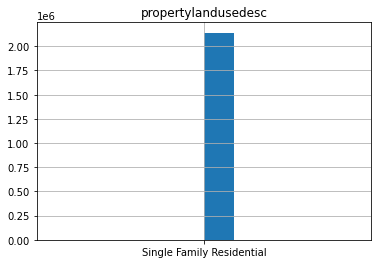

In [40]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

In [72]:
df.shape

(2140235, 7)

In [73]:
# What percentage of properties have 6 or less bathrooms?
df[df.bathroomcnt <= 6].shape[0] / df.shape[0]

0.9956481414424116

In [74]:
# What percentage of properties have 6 or less bedrooms?
df[df.bedroomcnt <= 6].shape[0] / df.shape[0]

0.9970180844626875

In [87]:
# What percentage of properties are less than $1.5m in tax value?
df[df.taxamount < 25_000].shape[0] / df.shape[0]

0.9877840787858921

In [83]:
df[df.calculatedfinishedsquarefeet < 20_000].shape[0] / df.shape[0] #(see below for reason)

0.9999551451125694

In [ ]:
#can make more bins to get more column separations

bedroomcnt


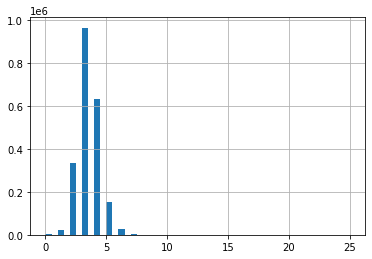

bathroomcnt


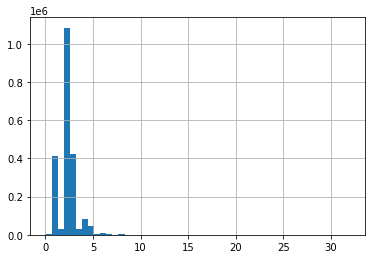

calculatedfinishedsquarefeet


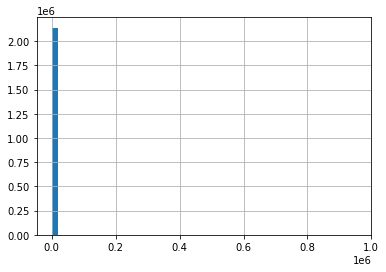

taxvaluedollarcnt


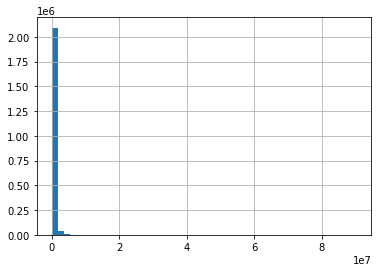

yearbuilt


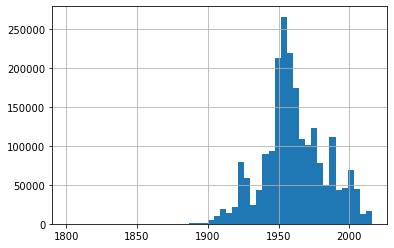

taxamount


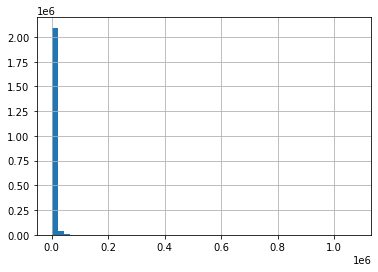

fips


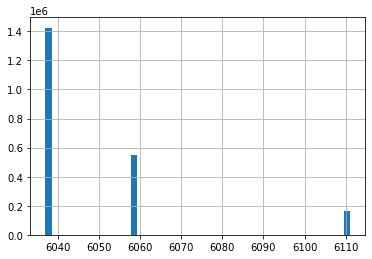

In [79]:
for col in df.columns:
    print(col)
    df[col].hist(bins=50)
    plt.show()

In [ ]:
for col in df.columns:
    
    df[col].hist(bins=50)
    plt.show()

In [81]:
df[df.calculatedfinishedsquarefeet < 20_000].shape[0] / df.shape[0]

0.9999551451125694

array([[<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>],
       [<AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

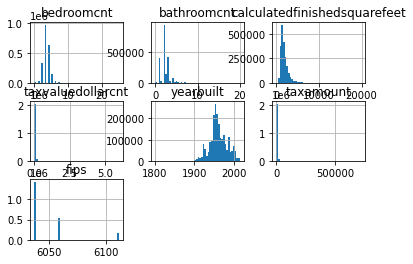

In [82]:
df[df.calculatedfinishedsquarefeet < 20_000].hist(bins=50)

In [ ]:
df[df.calculatedfinishedsquarefeet < 20_000].shape[0] / df.shape[0]

In [ ]:
df[df.calculatedfinishedsquarefeet < 20_000].hist(bins=50)

In [ ]:
#so drop teh ones with bathrooms over 6. It's warping your data.

In [45]:
df = df[df.bathroomcnt < 7]

In [46]:
df = df[df.bedroomcnt < 7]

In [88]:
df = df[df.taxamount < 25_000]

In [85]:
df = df[df.calculatedfinishedsquarefeet < 20_000]

In [90]:
df.shape[0]/2152863

0.9784240799344872

In [ ]:
#i have so far lost 3.2% total of the data

bedroomcnt


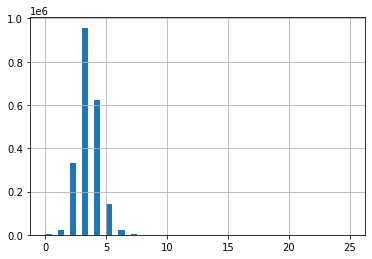

bathroomcnt


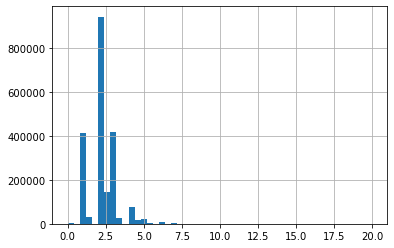

calculatedfinishedsquarefeet


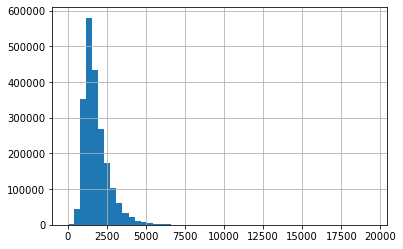

taxvaluedollarcnt


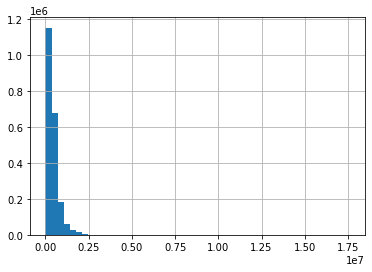

yearbuilt


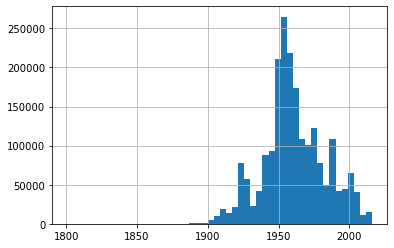

taxamount


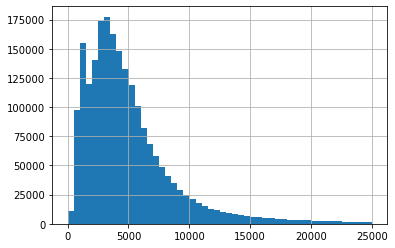

fips


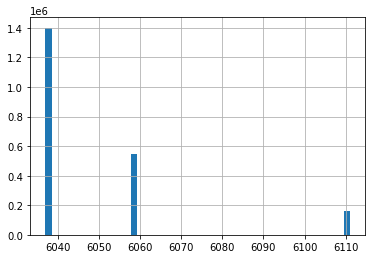

In [91]:
for col in df.columns:
    print(col)
    df[col].hist(bins=50)
    plt.show()

# 3 
Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [62]:
df = new_zillow_data()

In [63]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips',
       'propertylandusedesc'],
      dtype='object')

In [64]:
def wrangle_zillow():
    df = get_zillow_data()
    prep_zillow(df)
    df = df.drop(columns = 'propertylandusedesc')
    return df

In [65]:
df = wrangle_zillow()

In [66]:
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')